In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [38]:
dataset = pd.read_csv('c2.csv')
dataset

,#,sa02,sa1,sat,pga,seismicity,story_num,zi/h,Total height,Mass,Period,accel_dir1,disp_dir1,drift_dir1,react_dir1,vel_dir1
0,EQ1,1.9294,0.7536,2.1144,0.5831,0,1,0.0,3.2,100000,0.174911,0.583115,0.000000,0.000000,367822.5000,0.000000
1,EQ2,0.2842,0.2023,0.2172,0.1395,0,1,0.0,3.2,100000,0.174911,0.139550,0.000000,0.000000,167202.6663,0.000000
2,EQ3,0.3191,0.3029,0.3062,0.1591,0,1,0.0,3.2,100000,0.174911,0.159107,0.000000,0.000000,191407.7452,0.000000
3,EQ4,0.8270,0.3352,1.0861,0.3378,0,1,0.0,3.2,100000,0.174911,0.337773,0.000000,0.000000,367822.5000,0.000000
4,EQ5,0.8847,0.3805,1.2538,0.5465,0,1,0.0,3.2,100000,0.174911,0.546482,0.000000,0.000000,367822.5000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,EQ107,0.7142,0.5385,0.5041,0.3854,0,13,1.0,38.4,100000,1.089447,0.518545,0.181719,0.005181,526125.9514,0.798628
19976,EQ108,0.6358,0.4857,0.3770,0.3461,0,13,1.0,38.4,100000,1.089447,0.419317,0.135619,0.001399,579050.9036,0.582421
19977,EQ109,0.9575,0.2976,0.2387,0.4431,0,13,1.0,38.4,100000,1.089447,0.462097,0.111097,0.007332,556932.5275,0.610679
19978,EQ110,0.4173,0.1540,0.1221,0.1727,0,13,1.0,38.4,100000,1.089447,0.390529,0.046361,0.001016,356598.0988,0.317573


In [39]:
yedonei=dataset[-1:]
yedonei

,#,sa02,sa1,sat,pga,seismicity,story_num,zi/h,Total height,Mass,Period,accel_dir1,disp_dir1,drift_dir1,react_dir1,vel_dir1
19979,EQ111,0.5971,0.2945,0.2631,0.3138,0,13,1.0,38.4,100000,1.089447,0.519248,0.084489,0.008683,541705.2783,0.627247


In [40]:
dataset=dataset.drop(['#', 'seismicity', 'story_num', 'disp_dir1', 'react_dir1'], axis=1)
dataset

,sa02,sa1,sat,pga,zi/h,Total height,Mass,Period,accel_dir1,drift_dir1,vel_dir1
0,1.9294,0.7536,2.1144,0.5831,0.0,3.2,100000,0.174911,0.583115,0.000000,0.000000
1,0.2842,0.2023,0.2172,0.1395,0.0,3.2,100000,0.174911,0.139550,0.000000,0.000000
2,0.3191,0.3029,0.3062,0.1591,0.0,3.2,100000,0.174911,0.159107,0.000000,0.000000
3,0.8270,0.3352,1.0861,0.3378,0.0,3.2,100000,0.174911,0.337773,0.000000,0.000000
4,0.8847,0.3805,1.2538,0.5465,0.0,3.2,100000,0.174911,0.546482,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
19975,0.7142,0.5385,0.5041,0.3854,1.0,38.4,100000,1.089447,0.518545,0.005181,0.798628
19976,0.6358,0.4857,0.3770,0.3461,1.0,38.4,100000,1.089447,0.419317,0.001399,0.582421
19977,0.9575,0.2976,0.2387,0.4431,1.0,38.4,100000,1.089447,0.462097,0.007332,0.610679
19978,0.4173,0.1540,0.1221,0.1727,1.0,38.4,100000,1.089447,0.390529,0.001016,0.317573


In [41]:
dataset.head()
data = dataset.iloc[:, :].values
data

array([[1.92940000e+00, 7.53600000e-01, 2.11440000e+00, ...,
        5.83115016e-01, 0.00000000e+00, 0.00000000e+00],
       [2.84200000e-01, 2.02300000e-01, 2.17200000e-01, ...,
        1.39549780e-01, 0.00000000e+00, 0.00000000e+00],
       [3.19100000e-01, 3.02900000e-01, 3.06200000e-01, ...,
        1.59106700e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.57500000e-01, 2.97600000e-01, 2.38700000e-01, ...,
        4.62096531e-01, 7.33164200e-03, 6.10679193e-01],
       [4.17300000e-01, 1.54000000e-01, 1.22100000e-01, ...,
        3.90528657e-01, 1.01614500e-03, 3.17573388e-01],
       [5.97100000e-01, 2.94500000e-01, 2.63100000e-01, ...,
        5.19247911e-01, 8.68250200e-03, 6.27246918e-01]])

In [42]:
y=data[:,8:]
y

array([[0.58311502, 0.        , 0.        ],
       [0.13954978, 0.        , 0.        ],
       [0.1591067 , 0.        , 0.        ],
       ...,
       [0.46209653, 0.00733164, 0.61067919],
       [0.39052866, 0.00101614, 0.31757339],
       [0.51924791, 0.0086825 , 0.62724692]])

In [43]:
X=data[:,:8]
X

array([[1.92940000e+00, 7.53600000e-01, 2.11440000e+00, ...,
        3.20000000e+00, 1.00000000e+05, 1.74911282e-01],
       [2.84200000e-01, 2.02300000e-01, 2.17200000e-01, ...,
        3.20000000e+00, 1.00000000e+05, 1.74911282e-01],
       [3.19100000e-01, 3.02900000e-01, 3.06200000e-01, ...,
        3.20000000e+00, 1.00000000e+05, 1.74911282e-01],
       ...,
       [9.57500000e-01, 2.97600000e-01, 2.38700000e-01, ...,
        3.84000000e+01, 1.00000000e+05, 1.08944742e+00],
       [4.17300000e-01, 1.54000000e-01, 1.22100000e-01, ...,
        3.84000000e+01, 1.00000000e+05, 1.08944742e+00],
       [5.97100000e-01, 2.94500000e-01, 2.63100000e-01, ...,
        3.84000000e+01, 1.00000000e+05, 1.08944742e+00]])

In [44]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


In [45]:
yscale.shape

(19980, 3)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size = 0.15, random_state = 0)
print(X_test)

[[0.31527709 0.08107607 0.11353396 ... 1.         0.         1.        ]
 [0.09902647 0.13992261 0.10222884 ... 1.         0.         1.        ]
 [0.07128209 0.03647291 0.02355568 ... 1.         0.         1.        ]
 ...
 [0.36088914 0.20889593 0.36806003 ... 0.63636364 0.         0.60291439]
 [0.08601466 0.01848345 0.08404409 ... 0.18181818 0.         0.38251366]
 [0.35124814 0.41182282 0.36655134 ... 1.         0.         1.        ]]


In [47]:

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet



In [48]:
from keras.layers import Dense, Dropout, Activation

In [49]:
model = Sequential()
model.add(Dense(256, input_dim=8, kernel_initializer='normal'))
model.add(Dense(120,kernel_initializer='normal', activation='relu'))

model.add(Dense(120, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

model.add(Dense(50, kernel_initializer='normal',activation='relu'))
model.add(Dense(3, kernel_initializer='normal',activation='tanh'))
	# Compile modelm

model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error','acc'])
history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=100,
          validation_split=0.15)


Epoch 1/100
49/49 [==============================] - 2s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0680 - acc: 0.7799 - val_loss: 0.0064 - val_mean_absolute_error: 0.0455 - val_acc: 0.7861
Epoch 2/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0429 - acc: 0.7975 - val_loss: 0.0039 - val_mean_absolute_error: 0.0361 - val_acc: 0.8615
Epoch 3/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0326 - acc: 0.8731 - val_loss: 0.0032 - val_mean_absolute_error: 0.0303 - val_acc: 0.8670
Epoch 4/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0304 - acc: 0.8788 - val_loss: 0.0030 - val_mean_absolute_error: 0.0283 - val_acc: 0.8776
Epoch 5/100
49/49 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0290 - acc: 0.8812 - val_loss: 0.0029 - val_mean_absolute_error: 0.0296 - val_acc: 0.8827
Epoch 6/100
49/49 [=====

In [62]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


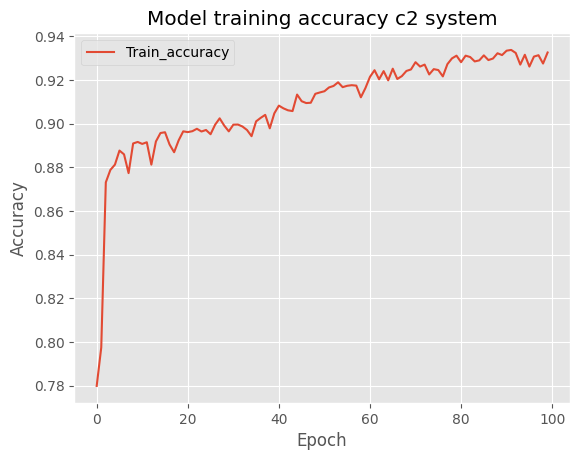

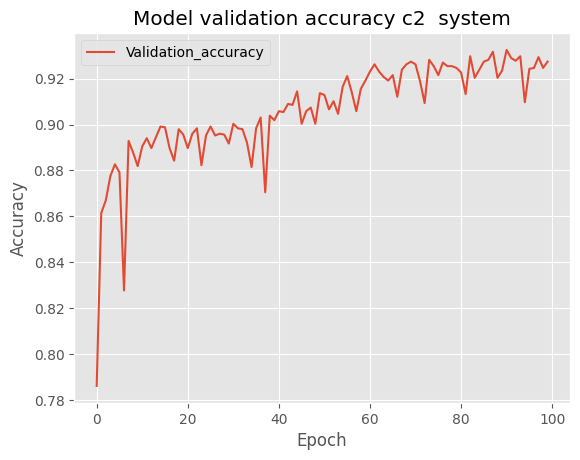

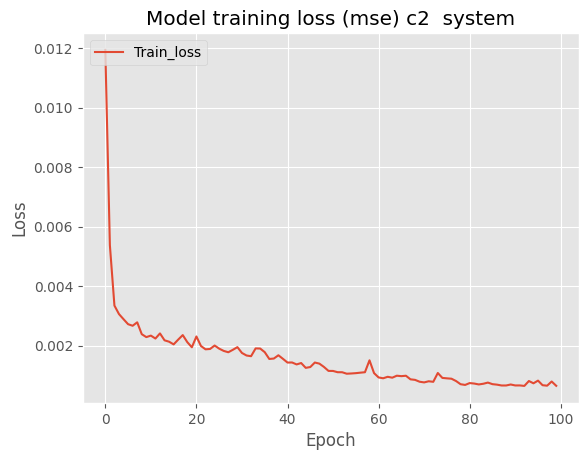

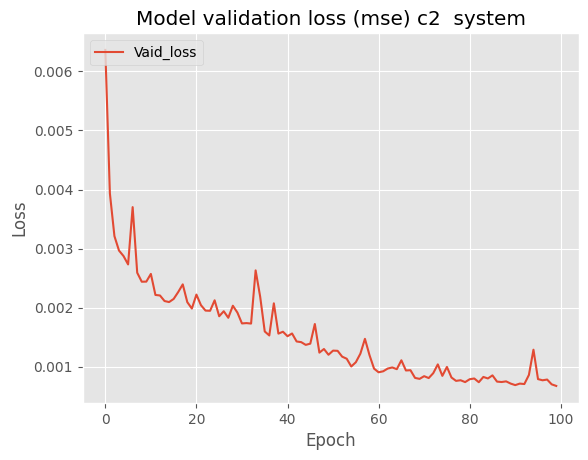

In [51]:
model_1='c2'
plt.style.use('ggplot')

plt.plot(history.history['acc'])



plt.title('Model training accuracy '+model_1+' system')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_accuracy'], loc='upper left')
plt.show()



plt.style.use('ggplot')

plt.style.use('ggplot')

plt.plot(history.history['val_acc'])



plt.title('Model validation accuracy '+model_1+'  system')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation_accuracy'], loc='upper left')
plt.show()



plt.style.use('ggplot')






plt.plot(history.history['loss'])



plt.title('Model training loss (mse) '+model_1+'  system')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_loss'], loc='upper left')
plt.show()




plt.plot(history.history['val_loss'])
plt.title('Model validation loss (mse) '+model_1+'  system')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Vaid_loss'], loc='upper left')
plt.show()







In [52]:
print("Avrage Train accuracy  :"+str(np.mean(history.history['acc'])))



print("Avrage Validation accuracy   :"+str(np.mean(history.history['val_acc'])))

print("Avrage Train mse    :"+str(np.mean(history.history['loss'])))

print("Avrage Train mean_absolute_error    :"+str(np.mean(history.history['mean_absolute_error'])))

print("Avrage Validation mse   :"+str(np.mean(history.history['val_loss'])))



print("Avrage Train mean_absolute_error    :"+str(np.mean(history.history['mean_absolute_error'])))

print("Avrage Validation mean_absolute_error   :"+str(np.mean(history.history['val_mean_absolute_error'])))





Avrage Train accuracy  :0.9088846504688263
Avrage Validation accuracy   :0.9061734700202941
Avrage Train mse    :0.0015400597092229873
Avrage Train mean_absolute_error    :0.02159399217925966
Avrage Validation mse   :0.0015312991384416818
Avrage Train mean_absolute_error    :0.02159399217925966
Avrage Validation mean_absolute_error   :0.02158633727580309


In [53]:
from sklearn import datasets, linear_model, metrics

In [54]:

predicted_value= model.predict(X_test)


print(predicted_value.shape)
#y_predict=scaler_y.inverse_transform(predicted_value)
#real=scaler_y.inverse_transform(y_test)
#Y_dataframee=pd.DataFrame(y_predict)

94/94 [==============================] - 0s 2ms/step
(2997, 3)


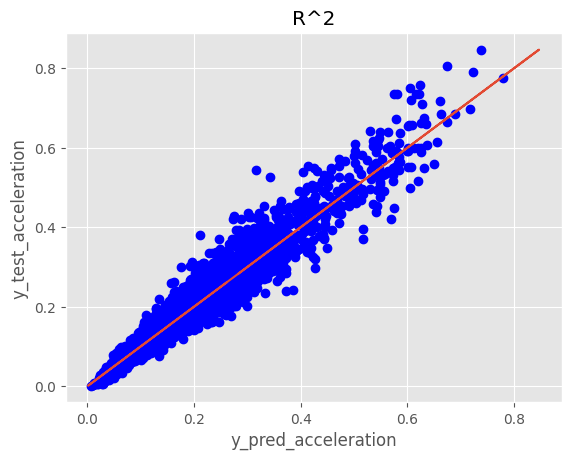

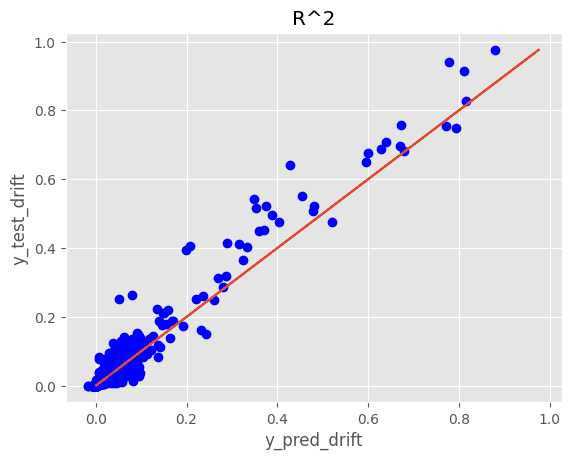

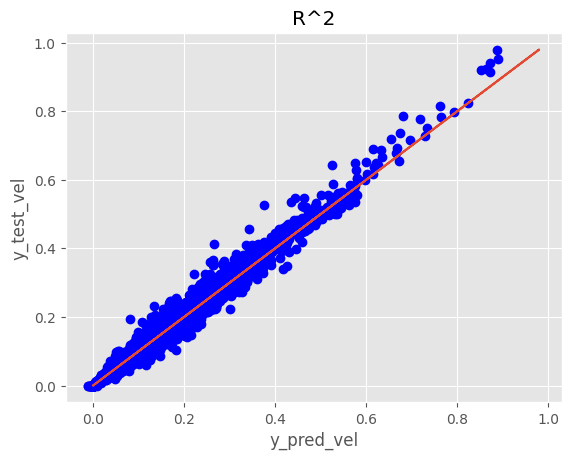

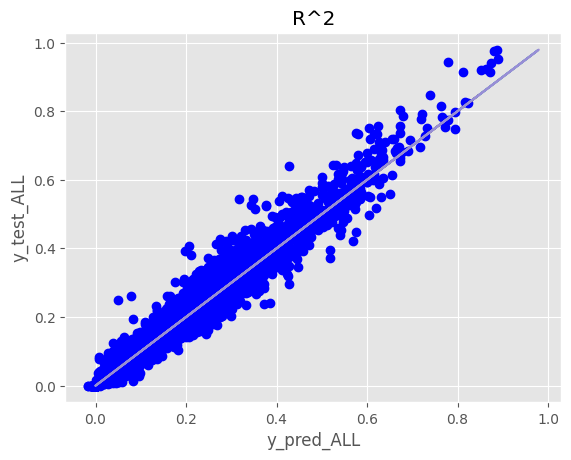

In [55]:
def  my_funcR(y_predict,real,type1):
  plt.title("R^2")
  plt.plot (y_predict, real, 'bo')
  plt.plot(real,real,'-')
  plt.xlabel('y_pred_'+type1)


  plt.ylabel('y_test_'+type1)
  plt.show()
          
my_funcR(predicted_value[:,0],y_test[:,0],'acceleration')
my_funcR(predicted_value[:,1],y_test[:,1],'drift')
my_funcR(predicted_value[:,2],y_test[:,2],'vel')

my_funcR(predicted_value,y_test,'ALL')





In [56]:
from sklearn.metrics import mean_squared_error
def mse(y1,real1): 
 return str(mean_squared_error(y1,real1)) 

def rmse(predictions, targets): 
  return str(np.sqrt(((predictions - targets) ** 2).mean()))
print('mse of accel_test '+ mse(predicted_value[:,0],y_test[:,0]))
print('mse of drift  '+ mse(predicted_value[:,1],y_test[:,1]))
print('mse of velo '+ mse(predicted_value[:,2],y_test[:,2]))



mse of accel_test 0.0011602479152520015
mse of drift  0.0002682453167507717
mse of velo 0.0004203339925435303


In [57]:
print("---------------------------------------------------------------------(0,1)------------------------------------------------------------")
print('mse of accel_test '+ mse(predicted_value[:,0],y_test[:,0]))
print('mse of displacement_test '+ mse(predicted_value[:,1],y_test[:,1]))
print('mse of drift_test '+ mse(predicted_value[:,2],y_test[:,2]))


---------------------------------------------------------------------(0,1)------------------------------------------------------------
mse of accel_test 0.0011602479152520015
mse of displacement_test 0.0002682453167507717
mse of drift_test 0.0004203339925435303


In [58]:
ydata=pd.DataFrame(predicted_value)
ydata

,0,1,2
0,0.214765,0.012816,0.052958
1,0.155400,0.011588,0.200207
2,0.089066,0.004562,0.044238
3,0.023728,-0.000222,-0.000202
4,0.054471,0.000986,0.030907
...,...,...,...
2992,0.444247,0.794270,0.445291
2993,0.196045,0.029567,0.132722
2994,0.267520,0.033199,0.186444
2995,0.126995,0.006501,0.031133


In [59]:
payam=pd.DataFrame(y_test)
payam

,0,1,2
0,0.260549,0.023184,0.063795
1,0.166682,0.014796,0.229449
2,0.098257,0.006048,0.043872
3,0.022785,0.000000,0.000000
4,0.068945,0.000495,0.018412
...,...,...,...
2992,0.517703,0.748753,0.396920
2993,0.216394,0.022326,0.110723
2994,0.214004,0.019925,0.183612
2995,0.091657,0.009963,0.035594


In [60]:
!pip install joblib

In [61]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  


ModuleNotFoundError: No module named 'pydrive'

In [ ]:
import pickle
from sklearn.externals import joblib

filename='c2.pkl'
joblib.dump(history, filename, protocol=2)



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['c2.pkl']

In [ ]:
mdl = joblib.load(filename)
print(mdl)

In [ ]:
file = drive.CreateFile({'parents':[{u'id': '1u6RyVxgvqC-Lw7cBDKXviv3URUA0fgFk'}]})
file.SetContentFile('c2.pkl')
file.Upload()

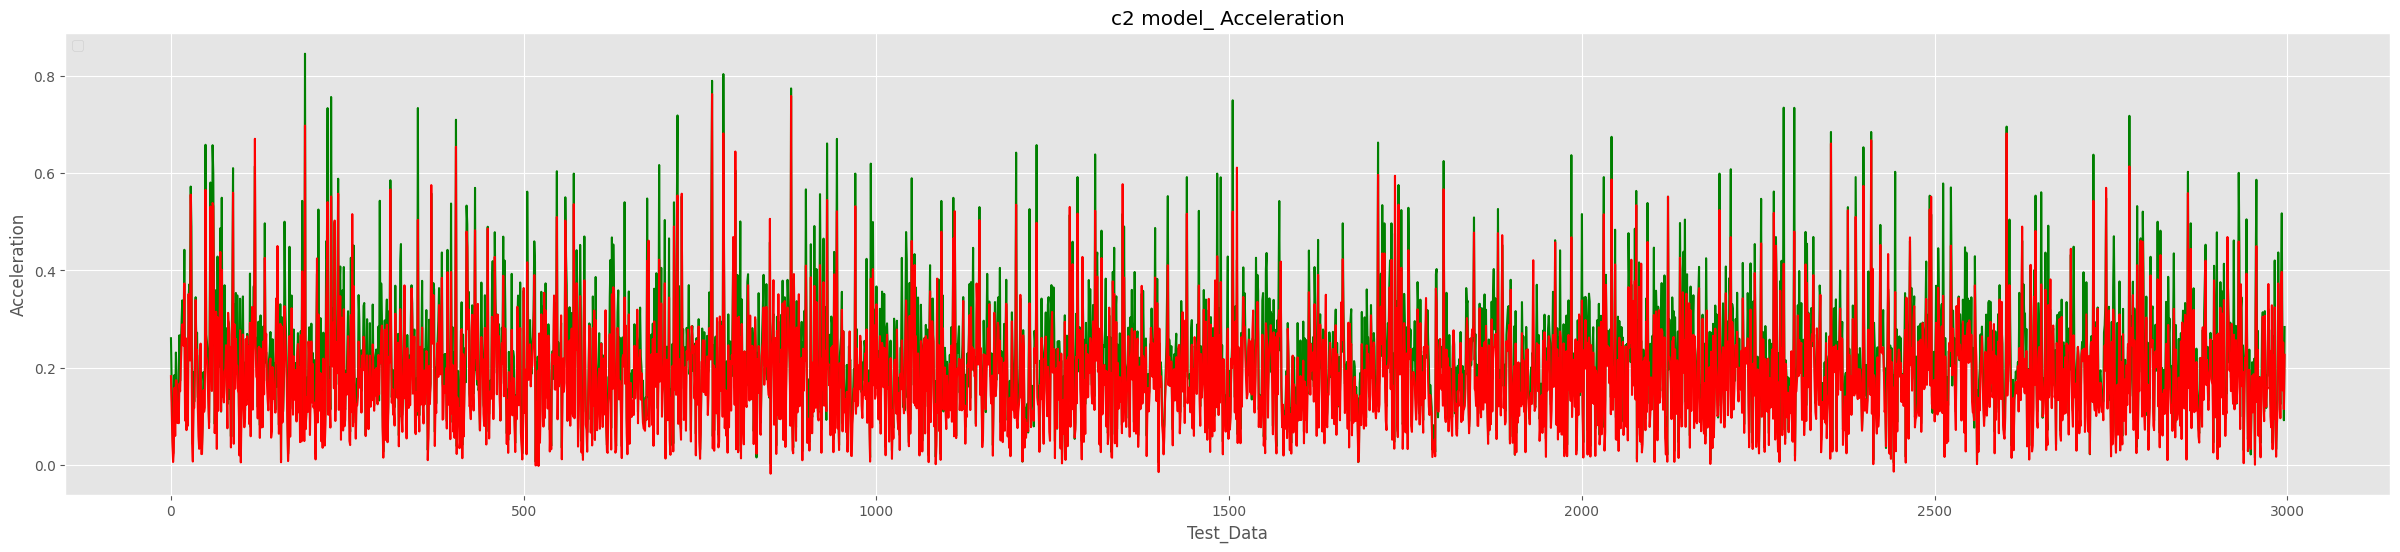

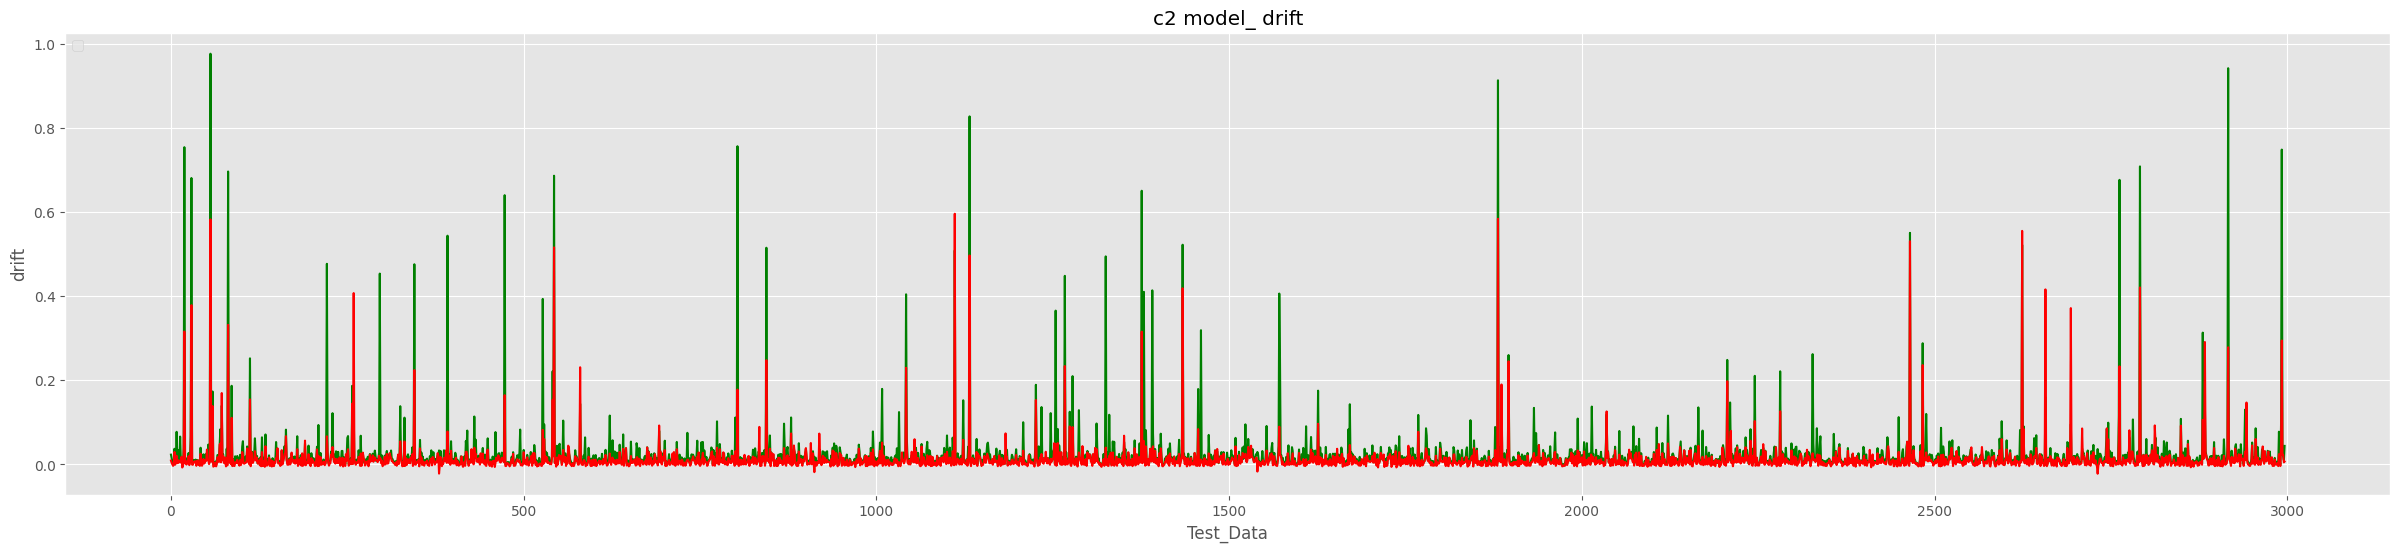

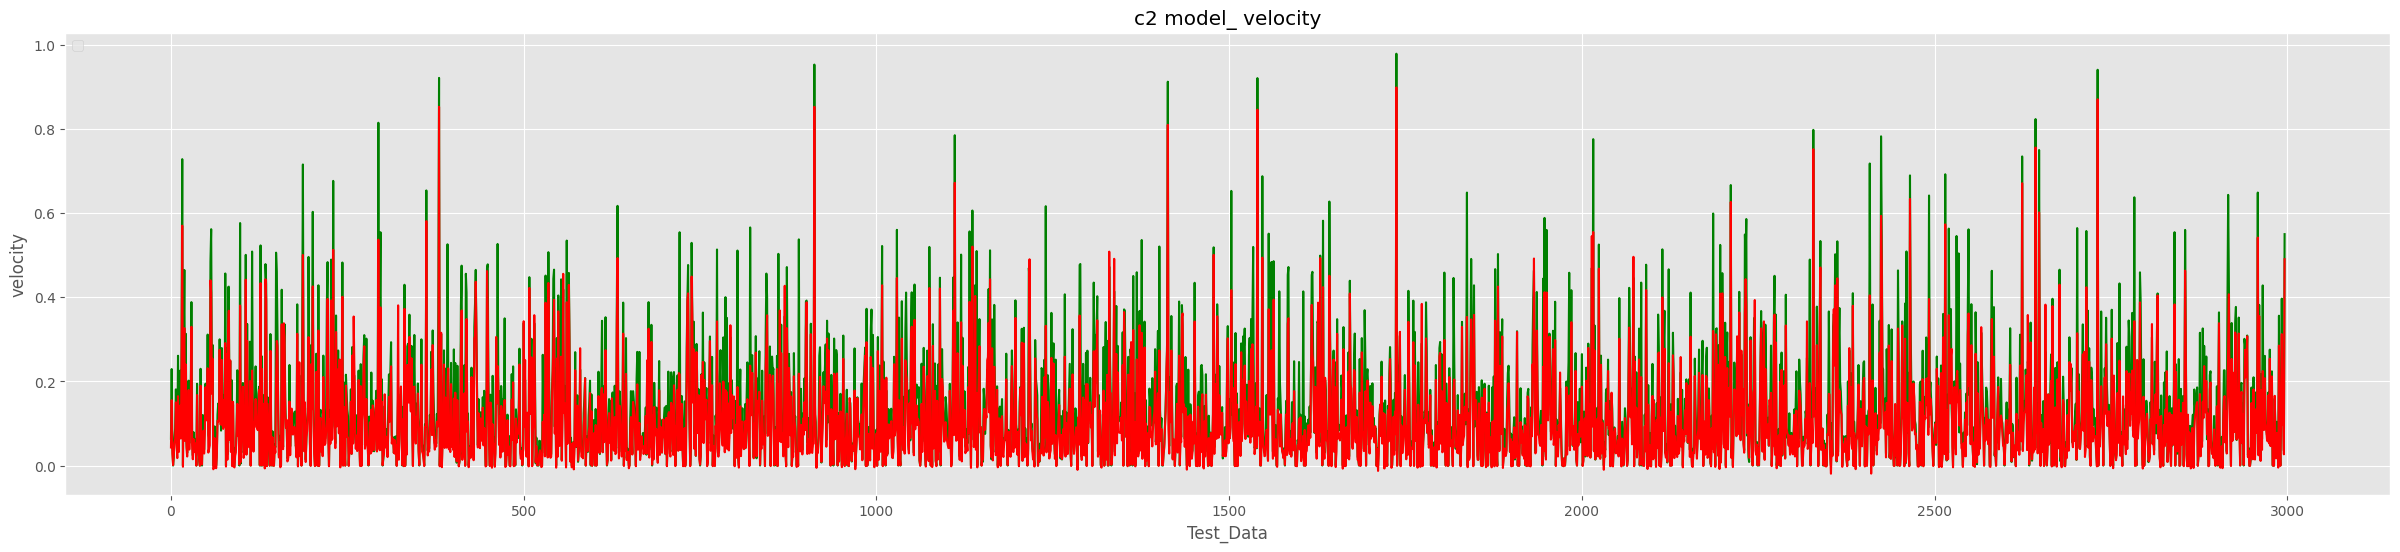

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_test_model(real,y_predict,ty):
  plt.figure(figsize=(30,6))
  plt.title(model_1+' model_ '+ty)
  plt.ylabel(ty)
  plt.legend(['Real_Data=green'], loc='upper left')  
  plt.legend(['prediction=red'], loc='upper left')
  plt.xlabel('Test_Data')
  
  plt.plot(real, color='green')
  plt.plot(y_predict, color= 'red')

  plt.show()
plot_test_model(y_test[:,0],predicted_value[:,0],'Acceleration')
plot_test_model(y_test[:,1],predicted_value[:,1],'drift')
plot_test_model(y_test[:,2],predicted_value[:,2],'velocity')



